<center><h1>Lab13:<br>Harmonic Motion</h1></center>
<a href="https://www.youtube.com/watch?v=j-zczJXSxnw">Click here to see a famous harmonic oscillator</href>

<h2>Simple Harmonic Motion</h2>
Simple harmonic motion plays a central role in much of physics and engineering. The description is used widely for disparate phenomena such as oscillations in an AC circuit, the bending of a bridge, and teh quantum mechanics of light. The prototypical simple harmonic oscillator is a mass on an ideal spring (i.e. one which obeys Hooke's Law). The restoring force provided by the spring is $F = -kx$ where $x$ is the displacement from equilibrium and $k$ is the spring constant.
<br>
The equation of motion for the mass is:<br>
$m \frac{d^2 x}{dt^2} = - kx$
<br>
which we can rewrite as:
<br>
$\frac{d^2x}{dt^2} + \omega^2 x = 0 \quad (1)$
<br>
where:
<br>
$\omega = \sqrt{\frac{k}{m}}$
<br>
is called the "angular frequency" of the system (not to be confused with the "frequency" $f = \frac{\omega}{2\pi}$)
<br>
Equation (1) is a second order differential equation to solve for $x(t)$. There are two very common forms for the general solution of this equation:
<h2 style="color:blue">Solution 1: Sines and Cosines</h2>
The solution of (1) will be a function which, when differentiated twice, will give us the original function times a constant. The obvious choice is either sine or cosine. However, this is a second-order differential equation, so there need to be two arbitrary constants in the full general solution. Let's use a linear combination of <i>both</i> sine and cosine:

In [40]:
import numpy as np
import sympy as sym

def x1(t):
    a * np.cos(ω*t) + b * np.sin(ω*t)

a, b, w, t, x, ω = sym.symbols('a b w t x ω')
x1 = sym.Eq(x, a * sym.cos(w * t) + b * sym.sin(w * t))

Right now, there appear to be three undetermined constants (A, B, and $\omega$), but we will see that one of them is fixed by the equation of motion (1)

In [46]:
eqn2 = sym.diff(x1.rhs, t, 2) + (ω**2 * eqn1.rhs)

We can collect the sine and cosine terms by simplifiying the equation.<br>
Collecting the sine and cosine terms:

In [47]:
sym.simplify(eqn2)

(-w**2 + ω**2)*(a*cos(t*w) + b*sin(t*w))

Shows that the differential equation will be satisfied for all A and B if $w = \omega$. The constant A and B are (at this point) arbitrary constants and will be determined by the initial conditions. In fact, A is the intial displacement of the oscillator.

In [43]:
x1.subs(t, 0)

Eq(x, a)

and B is $v(0)/w$ as can be seen by differentiating $x(t)$ to get velocity and then checking the velocity at $t=0$.

In [48]:
v1 = sym.diff(x1.rhs, t)
v1

-a*w*sin(t*w) + b*w*cos(t*w)

In [49]:
v1.subs(t, 0)

b*w

<h2 style="color:blue">Solution 2: Just Cosine</h2>
We chose a linear combination of sines and cosines above which solved equation (1), but this parameterization is not unqiue. Since $\sin(x + \phi)= \sin(x) + \cos(x)\sin(\phi)$, we can rewrite our solution so that it contains only cosines! However, since we still need <u>two</u> arbitrary constants, we pick up an extra piece in the argument of the cosine:

In [50]:
x2, a2, ϕ = sym.symbols('x2, a2, ϕ')
x2 = sym.Eq(x2, a2 * sym.cos(w*t + ϕ))
x2

Eq(x2, a2*cos(t*w + ϕ))

Here $\phi$ is a constant called the phase angle. <u>This solution is equivalent to Solution 1!</u> The only difference is how we parameterize it; sometimes the first solution is more convenient, sometimes not. $a_2$ is not, in general, the same constant as $a$ for a given set of initial conditions.<br>
Putting this back into our equation for simple harmonic motion gives

In [53]:
eqn3 = sym.diff(x2.rhs, t, 2) + ω**2 * x2.rhs
eqn3

-a2*w**2*cos(t*w + ϕ) + a2*ω**2*cos(t*w + ϕ)

In [54]:
sym.simplify(eqn3)

a2*(-w**2 + ω**2)*cos(t*w + ϕ)

Which shows that, as before, this is a solution for all times $t$ if $\omega = w$. 
<br>
We can discover the physical signifigance of $\phi$ by looking at $x(0)$ and $v(0)$.

In [55]:
x2.subs(t,0)

Eq(x2, a2*cos(ϕ))

In [57]:
v2 = sym.diff(x2.rhs, t)
v2.subs(t, 0)

-a2*w*sin(ϕ)

We can see that the constant $a_2$ fixes the amplitude of the oscillations, while the phase angle $\phi$ allows us to set initial values $x(t)$ and $v(t)$. Note that, for a given amplitude, there is always a choice of $b$ and $\phi$ such that our two solutions coincide!

In [58]:
#interactive plot

Note also that: <br>
$\frac{v(0)}{x(0)} = -w \tan(\phi)$
<br>
so that the phase angle $phi$ is given by $\phi = \arctan(\frac{v(0)}{w x(0)}$. Thus if $v(0) = 0, \phi = 0, or \pi$. If $x(0) = 0$, then $\phi = \frac{\pi}{2}$ or $\frac{3 \pi}{2}$. We can see this by looking at a plot of the tangent.

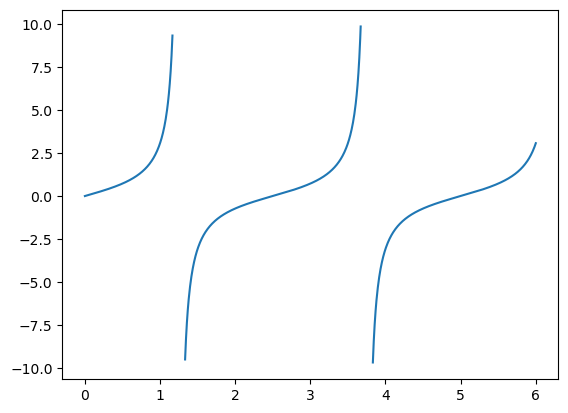

In [87]:
from matplotlib import pyplot as plt

#might be wrong graph
x = np.linspace(0.0, 6.0, 1000)
y = (np.tan(2 * np.pi * x/5))

tol = 10
y[y > tol] = np.nan
y[y < -tol] = np.nan

plt.plot(x,y)

<h2>Energy Conservation in Simple Harmonic Motion</h2>
(Below, we are using <u>Solution 2</u>, $x(t) = A2 \cos(w t + \phi)$; it is more useful for now!)
<br><br>
Energy is conserved in simple harmonic motion since there are no dissipative forces. During the motion the energy sloshes back and forth between kinetic and potential energy. The kinetic energy is:

In [91]:
KE, m = sym.symbols('KE m')
KE = sym.Eq(KE, 1/2 * m * v2**2)
KE

Eq(KE, 0.5*a2**2*m*w**2*sin(t*w + ϕ)**2)

and the potential energy is:

In [95]:
U, k = sym.symbols('U k')
U = sym.Eq(U, 1/2*k*x2.rhs**2)
U

Eq(U, 0.5*a2**2*k*cos(t*w + ϕ)**2)

The total energy is:

In [97]:
Energy = KE.rhs + U.rhs
Energy

0.5*a2**2*k*cos(t*w + ϕ)**2 + 0.5*a2**2*m*w**2*sin(t*w + ϕ)**2

Since $\omega = \sqrt{\frac{k}{m}}$ we have:

In [103]:
sym.simplify(Energy.subs(w, sym.sqrt(k/m)))

0.5*a2**2*k

which does not depend on time! This shows that the energy is constant throughout the motion.
<br><br>
Suppose we start our oscillator with $v(0) = 0$ and $x(0) = 10$cm. Then $\phi = 0$ and $a_2 = 10$cm. Suppose further that $m = 0.1$kg and $k = 1$N/m so that $\omega = \sqrt{10}$sec$^{-1}$ and the total energy of the oscillator is $E = \frac{1}{2}(.1)^2$J$=0.05$J. We can plot the kinetic and potential energies as a function of time. With these values we have an oscillator with a period of just under two seconds. Recall that the period $T$ is given by $T = \frac{2 \pi}{\omega}$.

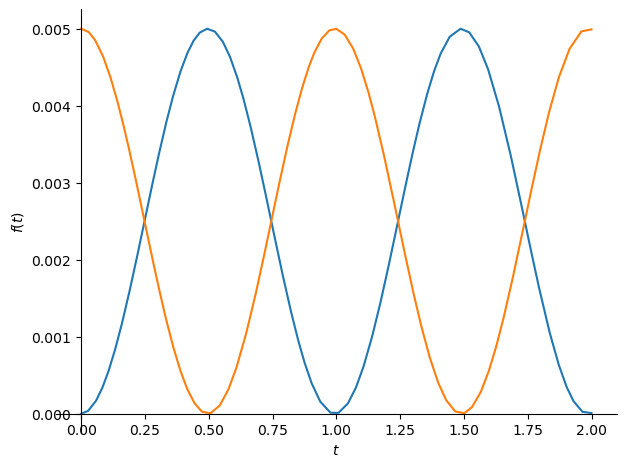

In [135]:
KE2 = KE.subs(w, sym.sqrt(k/m))
U2 = U.subs(w, sym.sqrt(k/m))
p1 = sym.plot(KE2.subs({a2: .1, m: .1, ϕ: 0, k: 1}).rhs, (t,0,2), show=False)
p2 = sym.plot(U2.subs({a2: .1, m: .1, ϕ: 0, k:1}).rhs, (t,0,2), show=False)
p1.append(p2[0])
p1.show()

The blue is kinetic energy and orange is potential.